In [71]:
# General
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For missing values and encoding
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# For model building
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from statsmodels.stats.proportion import proportion_confint

In [72]:
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/datasets/heart_2022_with_nans.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df.columns.tolist()

['State',
 'Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'PhysicalActivities',
 'SleepHours',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [74]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


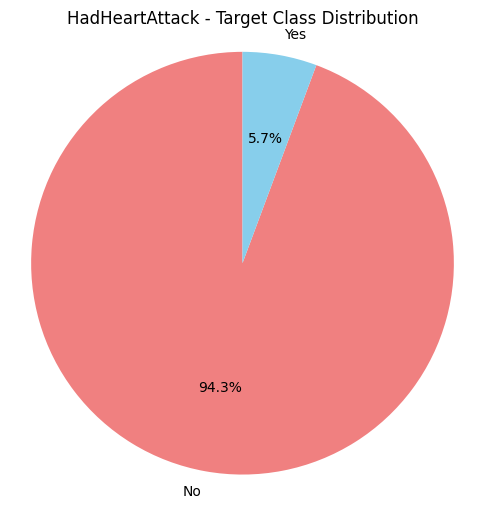

In [75]:
import matplotlib.pyplot as plt

# Get value counts
target_counts = df['HadHeartAttack'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'skyblue']  # Optional: adjust colors
)
plt.title("HadHeartAttack - Target Class Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [77]:
# Total missing values per column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
display(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))

,Missing Values,Percentage
TetanusLast10Tdap,82516,18.537423
PneumoVaxEver,77040,17.307226
HIVTesting,66127,14.855593
ChestScan,56046,12.590872
CovidPos,50764,11.404258
HighRiskLastYear,50623,11.372582
BMI,48806,10.964388
FluVaxLast12,47121,10.585849
AlcoholDrinkers,46574,10.462964
WeightInKilograms,42078,9.452926


In [78]:
# Print total null values in the entire dataset
total_null = df.isnull().sum().sum()
print(f"Total number of null values in the dataset: {total_null}")

Total number of null values in the dataset: 902665


In [79]:
# Duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
print("Before dropping duplicates:", df.shape)

Number of duplicate rows: 157
Before dropping duplicates: (445132, 40)


In [80]:
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

After dropping duplicates: (444975, 40)


##Dropping rows with null values in HadHeartAttack

In [81]:
# Drop rows where 'HadHeartAttack' is NaN
df = df.dropna(subset=['HadHeartAttack'])

# Confirm result
print("Shape after removing rows with missing target:", df.shape)
print("Remaining missing in 'HadHeartAttack':", df['HadHeartAttack'].isna().sum())

Shape after removing rows with missing target: (441915, 40)
Remaining missing in 'HadHeartAttack': 0


##Undersampling of Majority data

In [82]:
# Separate classes
majority_df = df[df['HadHeartAttack'] == 'No'].copy()
minority_df = df[df['HadHeartAttack'] == 'Yes'].copy()

print("Original class sizes:")
print("Majority (No):", len(majority_df))
print("Minority (Yes):", len(minority_df))


Original class sizes:
Majority (No): 416807
Minority (Yes): 25108


In [83]:
# Count missing values per row
majority_df['MissingCount'] = majority_df.isnull().sum(axis=1)

# Sort by missing values descending (rows with most missing values on top)
majority_df_sorted = majority_df.sort_values(by='MissingCount', ascending=False)

In [84]:
# How many 'Yes' rows to match
target_count = len(minority_df)

# Keep only the least-missing `No` rows to match count
majority_df_cleaned = majority_df_sorted.tail(target_count).drop(columns=['MissingCount'])


In [85]:
df_balanced = pd.concat([minority_df, majority_df_cleaned], axis=0).sample(frac=1, random_state=42)
df = df_balanced
print("Balanced dataset shape:", df.shape)
print(df['HadHeartAttack'].value_counts())

Balanced dataset shape: (50216, 40)
HadHeartAttack
No     25108
Yes    25108
Name: count, dtype: int64


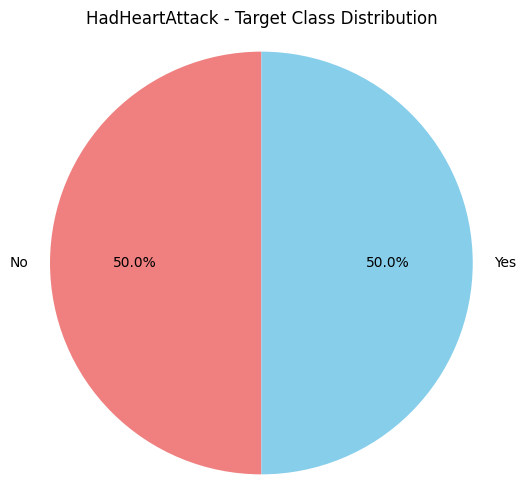

In [86]:
import matplotlib.pyplot as plt

# Get value counts
target_counts = df['HadHeartAttack'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'skyblue']  # Optional: adjust colors
)
plt.title("HadHeartAttack - Target Class Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [87]:
# Print total null values in the entire dataset
total_null = df.isnull().sum().sum()
print(f"Total number of null values in the dataset: {total_null}")

Total number of null values in the dataset: 49564


##Removing unwanted columns

In [88]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [89]:
# List of columns to remove (cleaned and deduplicated)
cols_to_remove = [
    'State',
    'LastCheckupTime',
    'RemovedTeeth',
    'HadSkinCancer',
    'HadArthritis',
    'DeafOrHardOfHearing',
    'BlindOrVisionDifficulty',
    'DifficultyConcentrating',
    'DifficultyWalking',
    'DifficultyDressingBathing',
    'DifficultyErrands',
    'ChestScan',
    'RaceEthnicityCategory',
    'HeightInMeters',
    'WeightInKilograms',
    'HIVTesting',
    'FluVaxLast12',
    'PneumoVaxEver',
    'TetanusLast10Tdap',
    'HighRiskLastYear',
    'CovidPos'
]

# Drop the columns from the DataFrame
df = df.drop(columns=cols_to_remove, errors='ignore')
print("✅ Shape after dropping specified columns:", df.shape)


✅ Shape after dropping specified columns: (50216, 19)


In [90]:
# Print total null values in the entire dataset
total_null = df.isnull().sum().sum()
print(f"Total number of null values in the dataset: {total_null}")

Total number of null values in the dataset: 13425


##Spliting into train & test

In [91]:
# Separate features and target
X = df.drop(columns=['HadHeartAttack'])
y = df['HadHeartAttack']

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (40172, 18)
Test set size: (10044, 18)


##Outliers removal

In [93]:
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [94]:
from scipy import stats
import numpy as np

# Optional: use IQR instead of z-score if you have skewed data
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define mask for rows to keep
mask = ~((X_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (X_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply mask to both X_train and y_train
X_train = X_train[mask]
y_train = y_train[mask]

In [95]:
X_train.shape, y_train.shape

((29206, 18), (29206,))

##Imputation

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

In [97]:
# Print total null values in the entire dataset
total_null = X_train.isnull().sum().sum()
total_null2 = X_test.isnull().sum().sum()
print(f"Total number of null values in the dataset: {total_null}")
print(f"Total number of null values in the dataset: {total_null2}")

Total number of null values in the dataset: 0
Total number of null values in the dataset: 0


In [98]:
for col in categorical_cols:
    print(f"{col}: {X_train[col].unique()}")

Sex: ['Male' 'Female']
GeneralHealth: ['Very good' 'Good' 'Fair' 'Excellent' 'Poor']
PhysicalActivities: ['Yes' 'No']
HadAngina: ['No' 'Yes']
HadStroke: ['No' 'Yes']
HadAsthma: ['No' 'Yes']
HadCOPD: ['No' 'Yes']
HadDepressiveDisorder: ['No' 'Yes']
HadKidneyDisease: ['No' 'Yes']
HadDiabetes: ['No' 'No, pre-diabetes or borderline diabetes' 'Yes'
 'Yes, but only during pregnancy (female)']
SmokerStatus: ['Never smoked' 'Former smoker' 'Current smoker - now smokes every day'
 'Current smoker - now smokes some days']
ECigaretteUsage: ['Never used e-cigarettes in my entire life' 'Not at all (right now)'
 'Use them some days' 'Use them every day']
AgeCategory: ['Age 70 to 74' 'Age 55 to 59' 'Age 60 to 64' 'Age 18 to 24'
 'Age 40 to 44' 'Age 50 to 54' 'Age 45 to 49' 'Age 65 to 69'
 'Age 80 or older' 'Age 35 to 39' 'Age 75 to 79' 'Age 30 to 34'
 'Age 25 to 29']
AlcoholDrinkers: ['Yes' 'No']


##Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder

# 1. Manual Ordinal Encoding
general_health_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
age_order = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
    'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
    'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'
]
age_map = {age: idx for idx, age in enumerate(age_order)}

X_train['GeneralHealth'] = X_train['GeneralHealth'].map(general_health_map)
X_test['GeneralHealth'] = X_test['GeneralHealth'].map(general_health_map)

X_train['AgeCategory'] = X_train['AgeCategory'].map(age_map)
X_test['AgeCategory'] = X_test['AgeCategory'].map(age_map)

# 2. Binary Encoding (Yes/No)
binary_cols = [
    'PhysicalActivities',
    'HadAngina',
    'HadStroke',
    'HadAsthma',
    'HadCOPD',
    'HadDepressiveDisorder',
    'HadKidneyDisease',
    'AlcoholDrinkers'
]
binary_map = {'No': 0, 'Yes': 1}
for col in binary_cols:
    X_train[col] = X_train[col].map(binary_map)
    X_test[col] = X_test[col].map(binary_map)

# 3. One-Hot Encoding (nominal columns)
ohe_cols = [
    'Sex',
    'HadDiabetes',
    'SmokerStatus',
    'ECigaretteUsage'
]
X_train = pd.get_dummies(X_train, columns=ohe_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=ohe_cols, drop_first=True)

# Align columns in case one-hot encoding produced different sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Convert any boolean columns to int (0/1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# 4. Label Encoding for target
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

X_train.head()


,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,HadCOPD,HadDepressiveDisorder,...,Sex_Male,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days
423233,3,4,0,1,8,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2821,2,0,0,1,5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
259655,3,0,0,1,7,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
351678,1,0,0,0,7,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
6467,3,0,0,1,7,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predictions and probabilities
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]
confidence_scores = rf.predict_proba(X_test).max(axis=1)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Model Evaluation Metrics:")
print(f"Accuracy:    {accuracy:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"Recall:      {recall:.4f}")
print(f"F1 Score:    {f1:.4f}")
print(f"ROC-AUC:     {roc_auc:.4f}")

# 95% Confidence Interval for Accuracy
n = len(y_test)
correct = (y_test == y_pred).sum()
lower, upper = proportion_confint(correct, n, alpha=0.05, method='wilson')

print(f"95% Confidence Interval for Accuracy: ({lower:.4f}, {upper:.4f})")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Example: Confidence Scores (first 10 predictions)
print("\nConfidence Scores (first 10):")
print(np.round(confidence_scores[:10], 4))


Model Evaluation Metrics:
Accuracy:    0.7873
Precision:   0.7937
Recall:      0.7766
F1 Score:    0.7850
ROC-AUC:     0.8677
95% Confidence Interval for Accuracy: (0.7792, 0.7952)

Confusion Matrix:
[[4008 1014]
 [1122 3900]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      5022
           1       0.79      0.78      0.79      5022

    accuracy                           0.79     10044
   macro avg       0.79      0.79      0.79     10044
weighted avg       0.79      0.79      0.79     10044


Confidence Scores (first 10):
[1.     0.5533 0.92   0.7959 0.5733 0.56   0.86   0.9667 0.5133 0.5   ]


In [101]:
df.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage',
       'AgeCategory', 'BMI', 'AlcoholDrinkers'],
      dtype='object')

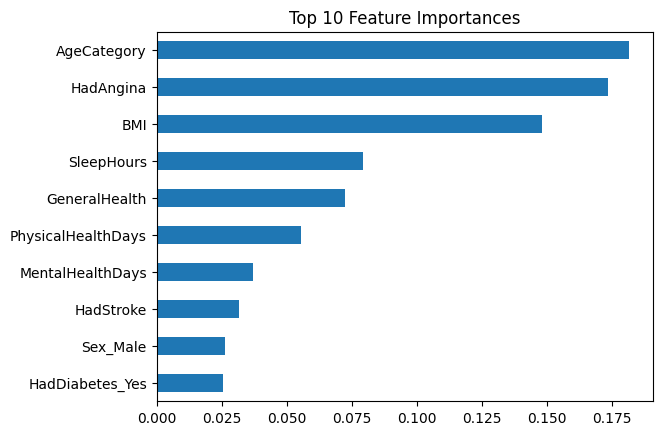

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
importance_df.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [103]:
X_train.shape+X_test.shape

(29206, 24, 10044, 24)